# Обучение с учителем. Регрессия

## Линейная регрессия: аналитическое решение

### АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY

In [1]:
#Импортируем все необходимые библиотеки
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
#Пропишем названия столбцов для data frame
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Загрузим наш data frame
boston_data = pd.read_csv('data/housing.csv', header=None,
                          delimiter=r"\s+", names=column_names)
display(boston_data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#Выведем информацию
display(boston_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

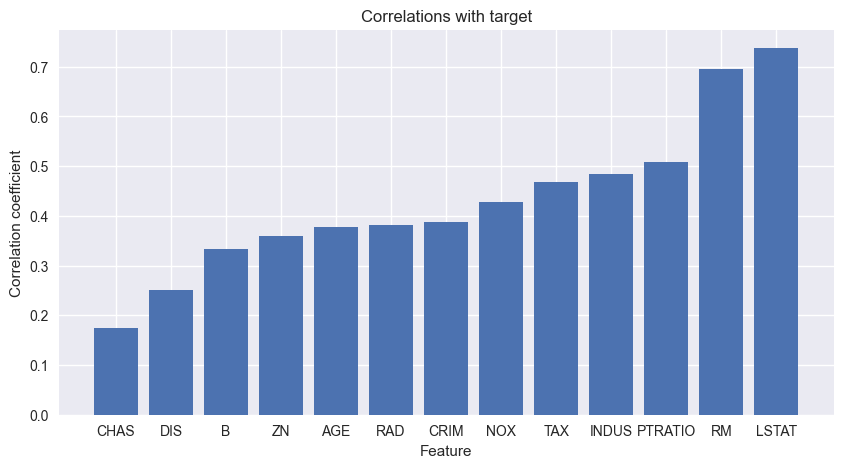

In [19]:
#Построим солбчатую диаграмму для визуализации модульного значения корреляций

#Вычислим модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10,5)) #Фигура + координатная плоскость

#Столбчатая диаграмма
ax.bar(corr_with_target.index, corr_with_target.values)
#Название графика
ax.set_title('Correlations with target')
#Название оси x
ax.set_xlabel('Feature')
#Название оси y
ax.set_ylabel('Correlation coefficient');

In [ ]:
#Построим линейную регрессию

#Определяем что есть Х и y

#Матрица наблюдений
X = boston_data[['LSTAT']] #[[]] позволяют выбрать признак из DF, сохраняя его в виде таблицы
#Вектор плавильных ответов
y = boston_data['MEDV']

display(X.head())
display(y.head())

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [27]:
#Функция для линейной регрессии
def linear_regression(X, y):
    #Создаем вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

In [29]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [ ]:
#При появлении нового участка Бостона, можно предсказать 
#значение медианной стоимости домов путем подстановки значений в модель

#Задаем процент низкостатусного населения
x_example = 5.18
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted_value: {:.2f}'.format(float(y_predict)))

Predicted_value: 29.63


In [39]:
#Напишем функцию у которой будет три обязательных аргумента
#(матрица наблюдений X, столбец правильных ответов y и столбец предсказания модели y_pred)

def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    #Фигура + координатная плоскость
    fig, ax = plt.subplots(figsize=(8,4))
    #Диаграмма рассеяния
    ax.scatter(X, y_true, alpha=0.7, label='Sample data')
    #Линейный график
    ax.plot(X, y_predict, color='black', label='Regression model')
    #Название оси абсцисс
    ax.set_xlabel(xlabel)
    #Название оси ординат
    ax.set_ylabel(ylabel)
    #Легенда
    ax.legend(facecolor='white', fontsize=11)

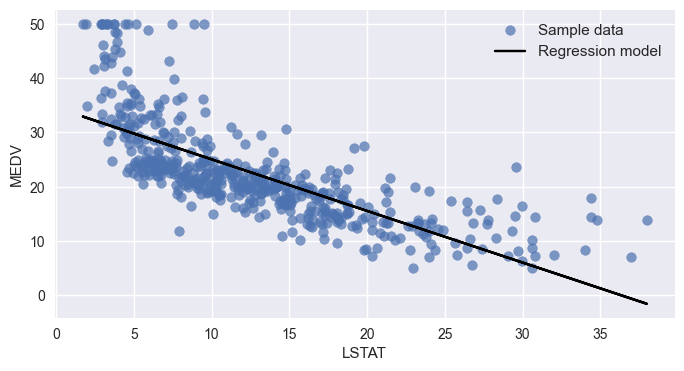

In [40]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)